In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [9]:
training_df = pd.read_csv("50_Startups.csv")
training_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.8
1,162597.7,151377.6,443898.5,California,191792.1
2,153441.5,101145.6,407934.5,Florida,191050.4
3,144372.4,118671.9,383199.6,New York,182902.0
4,142107.3,91391.8,366168.4,Florida,166187.9


In [10]:
training_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.0,50.0,50.0,50.0
mean,73721.6,121344.6,211025.1,112012.6
std,45902.3,28017.8,122290.3,40306.2
min,0.0,51283.1,0.0,14681.4
25%,39936.4,103730.9,129300.1,90138.9
50%,73051.1,122699.8,212716.2,107978.2
75%,101602.8,144842.2,299469.1,139766.0
max,165349.2,182645.6,471784.1,192261.8


In [11]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [32]:
training_df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.0,0.2,0.7,1.0
Administration,0.2,1.0,-0.0,0.2
Marketing Spend,0.7,-0.0,1.0,0.7
Profit,1.0,0.2,0.7,1.0


In [34]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=40)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 450000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Train on 50 samples
Epoch 1/50
50/50 [==============================] - 0s 7ms/sample - loss: 123219829035.5200 - root_mean_squared_error: 351026.8438
Epoch 2/50
50/50 [==============================] - 0s 2ms/sample - loss: 92717523937.2800 - root_mean_squared_error: 304495.5312
Epoch 3/50
50/50 [==============================] - 0s 2ms/sample - loss: 68282583874.5600 - root_mean_squared_error: 261309.3594
Epoch 4/50
50/50 [==============================] - 0s 2ms/sample - loss: 47063861966.0800 - root_mean_squared_error: 216942.0625
Epoch 5/50
50/50 [==============================] - 0s 2ms/sample - loss: 29642923112.9600 - root_mean_squared_error: 172171.2188
Epoch 6/50
50/50 [==============================] - 0s 2ms/sample - loss: 17751716101.7600 - root_mean_squared_error: 133235.5625
Epoch 7/50
50/50 [==============================] - 0s 2ms/sample - loss: 8672555281.1200 - root_mean_squared_error: 93126.5391
Epoch 8/50
50/50 [==============================] - 0s 2ms/sample - los

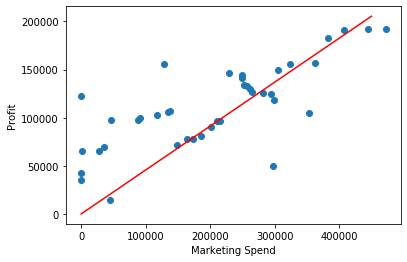

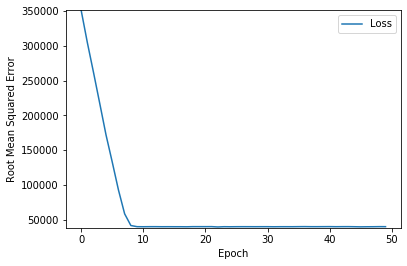

In [36]:
# The following variables are the hyperparameters.
learning_rate = 0.005
epochs = 50
batch_size = 1

# Specify the feature and the label.
my_feature = "Marketing Spend"  # the total R&D spent.
my_label="Profit" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)